# Pair Programming Estadística III

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.  

**Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.**  

> Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.  

**Objetivos**  

Los objetivos de hoy son:  

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    - Tabla de contingencia
    - Coeficiente de correlación de las variables numéricas del dataset.
    - Sesgos de alguna de las variables numéricas del dataset.
    - Intervalo de confianza de algunas de las variables numéricas del dataset

In [5]:
df = pd.read_csv('datos/open2.csv', index_col=0)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesRange,CustomersRange
0,1,Friday,2015-07-31,5263,555,1,1,0,1,Normal,Some
1,2,Friday,2015-07-31,6064,625,1,1,0,1,Normal,Some
2,3,Friday,2015-07-31,8314,821,1,1,0,1,Normal,Some
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,Very high,A lot
4,5,Friday,2015-07-31,4822,559,1,1,0,1,Low,Some


In [11]:
# tabla de contingencia columnas 'DayOfWeek' y 'SalesRange'
df_crosstab = pd.crosstab(df['DayOfWeek'], df['SalesRange'], margins=True, normalize=True) 
df_crosstab

SalesRange,Extraordinay,High,Low,Normal,Very high,All
DayOfWeek,,,,,,
Friday,0.000015,0.034798,0.031646,0.092178,0.005555,0.164191
Monday,0.000072,0.051136,0.027025,0.068879,0.015805,0.162917
Saturday,0.000008,0.021547,0.068357,0.076501,0.004196,0.170609
Sunday,0.000044,0.000844,0.001505,0.001114,0.000747,0.004255
Thursday,0.000013,0.028897,0.038700,0.086662,0.005173,0.159446
Tuesday,0.000023,0.037666,0.039900,0.085257,0.007649,0.170495
Wednesday,0.000006,0.030437,0.042900,0.089419,0.005325,0.168087
All,0.000181,0.205325,0.250033,0.500011,0.044450,1.000000


In [26]:
# tabla de contingencia columnas 'CustomersRange' y 'SalesRange'
df_crosstab2 = pd.crosstab(df['CustomersRange'], df['SalesRange'], margins=True, normalize=True) 
df_crosstab2

SalesRange,Extraordinay,High,Low,Normal,Very high,All
CustomersRange,,,,,,
A few,0.000000,0.000258,0.178286,0.072386,0.000018,0.250948
A lot,0.000000,0.118797,0.001267,0.068503,0.016756,0.205324
Crowded,0.000060,0.014206,0.000002,0.002257,0.026772,0.043299
Extremely crowded,0.000118,0.000001,0.000000,0.000000,0.000257,0.000377
Some,0.000002,0.072062,0.070477,0.356864,0.000647,0.500052
All,0.000181,0.205325,0.250033,0.500011,0.044450,1.000000


In [13]:
# coeficiente de correlación entre las columnas 'Customers' y 'Sales'. El resto de columnas numéricas realmente solo incluyen valores 0 y 1 como indicación True/False o el número de la tienda, así que no se analizan.
coef_correl = round(df['Sales'].corr(df['Customers']), 2)
coef_correl

0.82

/tmp/ipykernel_764/1457494478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['Sales']], cmap= 'mako', annot= True, vmin= -1, vmax= 1)


<Axes: >

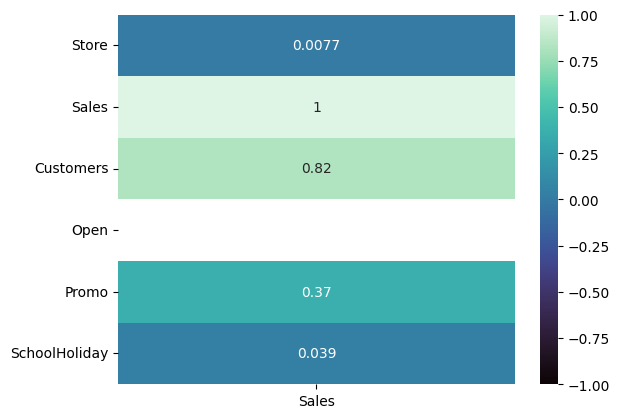

In [36]:
# Para verlo de forma gráfica obtenemos el heatmap de la columna 'Sales' y nos fijamos en el valor de su correspondencia con la columnas 'Customers'
sns.heatmap(df.corr()[['Sales']], cmap= 'mako', annot= True, vmin= -1, vmax= 1)

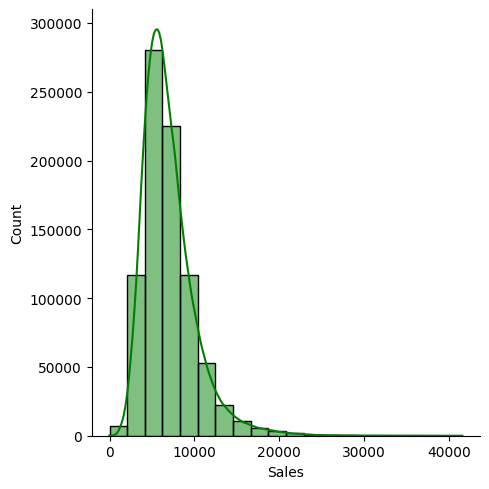

In [16]:
# sesgo de la columna 'Sales'
sns.displot(df['Sales'], color='green', kde=True, bins=20)

-La distribución de los datos de la columna 'Sales' está sesgada a la derecha.

In [22]:
# sesgo de la columna 'Customers'
skewness = round(skew(df['Customers']), 2)
skewness

2.79

-La distribución de los datos de la columna 'Customers' está sesgada a la derecha porque el valor es positivo.

In [37]:
# Intervalo de confianza de la columna 'Sales'
st.t.interval(alpha=0.95, df=len(df['Sales'])-1, loc=np.mean(df['Sales']), scale=st.sem(df['Sales']))

/tmp/ipykernel_764/3371255665.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(df['Sales'])-1, loc=np.mean(df['Sales']), scale=st.sem(df['Sales']))


(6948.8932172864725, 6962.135364225432)

In [39]:
# Intervalo de confianza de la columna 'Customers'
st.t.interval(alpha=0.99, df=len(df['Customers'])-1, loc=np.mean(df['Customers']), scale=st.sem(df['Customers']))

/tmp/ipykernel_764/502794808.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.99, df=len(df['Customers'])-1, loc=np.mean(df['Customers']), scale=st.sem(df['Customers']))


(761.6036946094314, 763.85309560175)

2. Interpretación de los resultados.  
    - Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

- Tabla de contingencia DayOfWeek-SalesRange: Los lunes tienden a tener ventas mayores que el resto de días en las categorías de ventas 'High', 'Very high' y 'Extraordinary'. Los sábados tienden a tener ventas más bajas que el resto de días.
- Tabla de contingencia CustomersRange-SalesRange: La mayor frecuencia se da entre las categorias de ambas variales del mismo orden (la primera categoría de CustomersRange tiene una relación más fuerte con la primera categoría de SalesRange etc.)
- Coeficiente de correlación y heatmap: La correlación entre las columnas 'Sales' y 'Customers' es positiva y muy alta (0.82), de manera que según aumenta el número de clientes aumentarán las ventas.
- Sesgos: La distribución de los datos de la columna 'Sales' está sesgada a la derecha. La distribución de los datos de la columna 'Customers' está sesgada a la derecha porque el valor es positivo.
- Intervalos de confianza: Hay un 95% de probabilidad de que las ventas de un día estén entre 6948.89€ y 6962.14€. hay un 99% de probabilidad de que el número de clientes de un día esté entre 761 y 764.
